Logistic regression
----
- C가 규제 정도. C가 클수록 규제가 약화됨.
    - 규제가 약화될수록 training data 맞추는데 더 집중함. overfitting 위험 증가.
- 이 C 값은 보통 log scale로 최적치를 정해준다고 함.
    - 즉, 0.01, 0.1, 1, 10 처럼 바꿔가면서 테스트해본다.고
- L1 규제를 쓸지, L2 규제를 쓸지 정할 수 있음.
    - 기본적으로는 L2 규제를 많이 쓴다.
    - 중요하지 않은 특성이 많아서 많은 w를 0으로 만들고 싶으면 L1을 써라. L2는 왠만하면 w가 0이 안됨.


- solver='sag' 옵션: stochastic average gradient descent 의 약자.
    - 대용량 데이터셋의 경우는 이 옵션을 써서 빠르게 처리하도록 할 수 있음.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#stratify는 여러 그룹이 존재할 때, 각 그룹의 data가 train data와 test data에 골고루 섞이도록 하는 것.
#이것이 없으면 train data에는 암환자 data만 들어가고, test data에는 정상 data만 들어가는 등의 split이 일어날 수 있음.

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.01).fit(X_train, y_train)


print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.937
테스트 세트 점수: 0.930


d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

라는 warning이 나왔다.

- lbfgs: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm" 으로 scikit learn library에서 제공하는 solver's algorithm이라고 함.


이 문제를 해결하기 위해서, LogisticRegression(... solver='lbfgs', max_iter=100 ...) 같이 solver 지정 후, max_iter 값을 더 크게 잡아주기. 

solver 의 default는 lbfgs 이고, max_iter의 default는 100이라고 함.

[여기 참고](https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter)

In [19]:
logreg = LogisticRegression(C=100, solver='lbfgs', max_iter=9000).fit(X_train, y_train)
#일단 노가다로 여러 max_iter 값을 넣어보면서 경고문이 나오지 않는 값을 찾아봄.

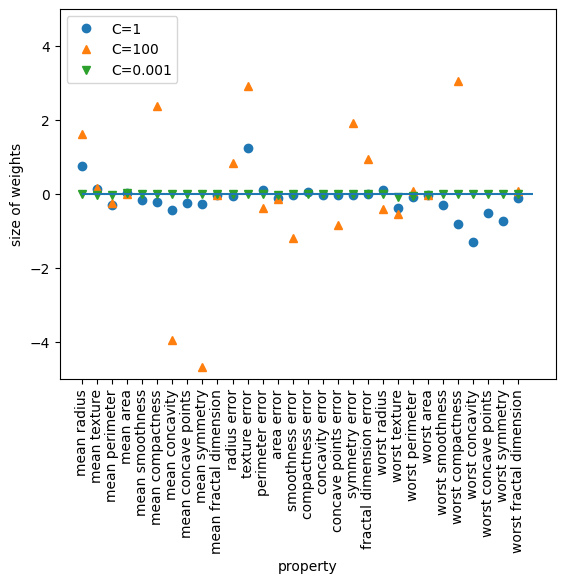

In [20]:
import matplotlib.pyplot as plt

plt.plot(LogisticRegression(C=1, solver='lbfgs', max_iter=3000).fit(X_train, y_train).coef_.T, 'o', label="C=1")
plt.plot(LogisticRegression(C=100, solver='lbfgs', max_iter=9000).fit(X_train, y_train).coef_.T, '^', label="C=100")
plt.plot(LogisticRegression(C=0.001, solver='lbfgs', max_iter=1000).fit(X_train, y_train).coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('property')
plt.ylabel("size of weights")
plt.legend()
